In [27]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [28]:
p_idx = torch.randperm(3 * 32 * 32)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     #transforms.Lambda(lambda x: x.view(-1)[p_idx].view(3, 32, 32))
    ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=2000, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  cat horse   cat   cat


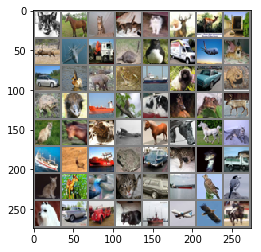

In [30]:

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [22]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.drop1 = nn.Dropout(),
        self.fc2 = nn.Linear(120, 84)
        self.drop2 = nn.Dropout(),
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
def eval():
    correct, total = 0, 0
    cnt = 0
    total_loss = 0
    with torch.no_grad():
        for (images, labels) in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            total_loss += loss.item()
            cnt += 1

    return 100 * correct / total, total_loss / cnt

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) # momentum=0.9)

In [25]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    correct, total = 0, 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # move on device
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

        if i % 200 == 199:    # print every 2000 mini-batches
            train_acc = 100 * correct /  total
            correct, total = 0, 0
            train_loss = running_loss / 200.
            running_loss = 0.0
            test_acc, test_loss = eval()
            
            print(f"[TRAIN] Acc = {train_acc:4.2f}%, Loss = {train_loss:1.4f}.")
            print(f"[TEST ] Acc = {test_acc:4.2f}%, Loss = {test_loss:1.4f}.")
            

print('Finished Training')

[TRAIN] Acc = 33.25%, Loss = 1.8236.
[TEST ] Acc = 41.72%, Loss = 1.6118.
[TRAIN] Acc = 44.88%, Loss = 1.5134.
[TEST ] Acc = 48.52%, Loss = 1.4129.
[TRAIN] Acc = 49.38%, Loss = 1.4044.
[TEST ] Acc = 52.14%, Loss = 1.3351.
[TRAIN] Acc = 55.33%, Loss = 1.2355.
[TEST ] Acc = 55.72%, Loss = 1.2294.
[TRAIN] Acc = 57.73%, Loss = 1.1835.
[TEST ] Acc = 58.39%, Loss = 1.1622.
[TRAIN] Acc = 59.33%, Loss = 1.1415.
[TEST ] Acc = 59.12%, Loss = 1.1429.
[TRAIN] Acc = 62.59%, Loss = 1.0555.
[TEST ] Acc = 62.38%, Loss = 1.0731.
[TRAIN] Acc = 62.71%, Loss = 1.0396.
[TEST ] Acc = 62.49%, Loss = 1.0463.
[TRAIN] Acc = 64.60%, Loss = 1.0084.
[TEST ] Acc = 64.39%, Loss = 1.0048.
[TRAIN] Acc = 67.91%, Loss = 0.9058.
[TEST ] Acc = 65.01%, Loss = 0.9905.
[TRAIN] Acc = 67.91%, Loss = 0.9110.
[TEST ] Acc = 65.50%, Loss = 0.9788.
[TRAIN] Acc = 68.02%, Loss = 0.9140.
[TEST ] Acc = 67.06%, Loss = 0.9334.
[TRAIN] Acc = 70.37%, Loss = 0.8332.
[TEST ] Acc = 67.18%, Loss = 0.9347.
[TRAIN] Acc = 71.66%, Loss = 0.8084.
[